# Competition 

## Domain -- Finance & Insurance 
### Group ------  Group 16
### Members --  Akarsh, Anjali, Nidhin, Shartina, Vishnu

### Project by -- Vishnu 



## Objective:-

To increase the Customer Lifetime Value (clv) is the business requirement here.

# 1. Data Collection

## Dataset:-

Dataset contains multiple features in connection to the customer’s vehicle and insurance type

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1 : Loading the dataset

In [2]:
df= pd.read_csv('E:\PAATSHAALA\Assignments/VehicleInsuranceDataFinal.csv')

In [3]:
df.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Step 2 :- Feature description

In [4]:
df.shape

(4999, 22)

We have 4999 samples and 22 features from the dataset

# 2. Preprocessing

## Step 1 :- Verify missing values

In [5]:
df.isna().sum()

Unnamed: 0                       0
clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

<AxesSubplot:>

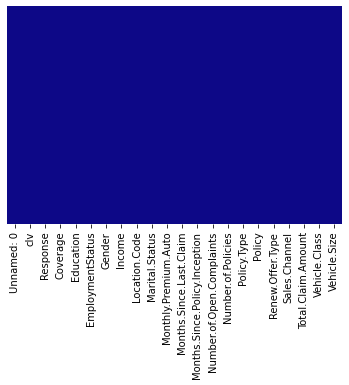

In [6]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='plasma')

We don't have missing values in the data set

### Step 2:- Checking for Outliers

In [7]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='clv'>

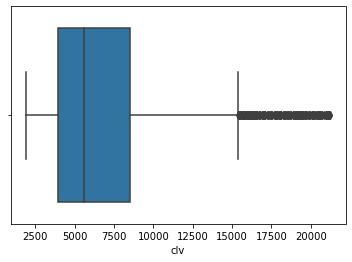

In [8]:
sns.boxplot(df.clv)

   
From the boxplot, it is evident that any data below or above, Q1 or Q3 respectively are outliers.
Hence we are removing clv values below 2500 and above 15000


In [9]:
df= df[(df.clv>2500) & (df.clv < 15000)]  

In [10]:
df.shape

(4409, 22)

Now, after removing outliers, samples are reduced to 4409 from 4999

### 3. Encoding

In [11]:
df.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


There are cetegorical features in the dataset. 
We have to change those into continuous fetures as it is required for further proceedings or processes. 

In [12]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [13]:
df.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,2,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,3,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,4,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,5,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


We have successfully encoded our dataset and all features are continuous now.

In [14]:
df.columns

Index(['Unnamed: 0', 'clv', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4998
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4409 non-null   int64  
 1   clv                            4409 non-null   float64
 2   Response                       4409 non-null   int32  
 3   Coverage                       4409 non-null   int32  
 4   Education                      4409 non-null   int32  
 5   EmploymentStatus               4409 non-null   int32  
 6   Gender                         4409 non-null   int32  
 7   Income                         4409 non-null   int64  
 8   Location.Code                  4409 non-null   int32  
 9   Marital.Status                 4409 non-null   int32  
 10  Monthly.Premium.Auto           4409 non-null   int64  
 11  Months.Since.Last.Claim        4409 non-null   int64  
 12  Months.Since.Policy.Inception  4409 non-null   i

This was an almost clean dataset as there were no missing values or columns with inappropriate datatype.
But there were some outliers which are removed and now this is a clean dataset.

### 4. Feature Reduction

### 1.Correlation Coefficient

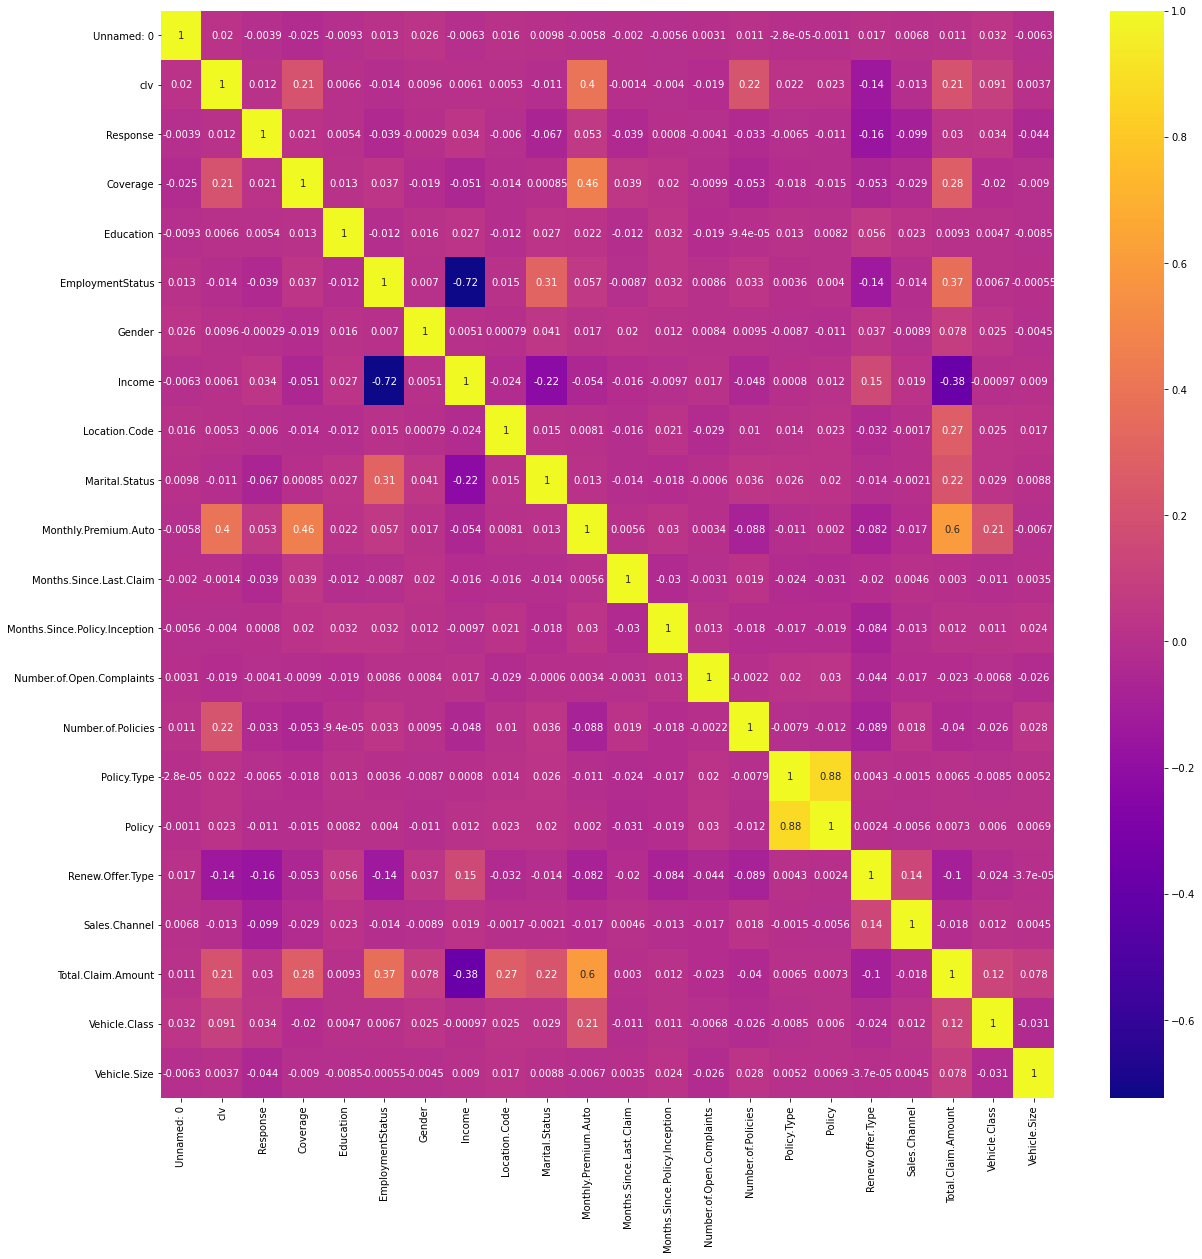

In [16]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="plasma")

### 2.Calculating VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(df)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const                            55.128101
Unnamed: 0                        1.004026
clv                               1.311307
Response                          1.051044
Coverage                          1.297416
Education                         1.008469
EmploymentStatus                  2.269202
Gender                            1.016905
Income                            2.243078
Location.Code                     1.169831
Marital.Status                    1.150163
Monthly.Premium.Auto              2.402762
Months.Since.Last.Claim           1.008513
Months.Since.Policy.Inception     1.015786
Number.of.Open.Complaints         1.008254
Number.of.Policies                1.105792
Policy.Type                       4.352787
Policy                            4.357069
Renew.Offer.Type                  1.117065
Sales.Channel                     1.028770
Total.Claim.Amount                2.432475
Vehicle.Class                     1.074398
Vehicle.Size                      1.021332
dtype: floa

In [18]:
df.head(5)

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,2,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,3,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,4,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,5,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


In [19]:
df.columns

Index(['Unnamed: 0', 'clv', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [20]:
x = df[['Coverage','Monthly.Premium.Auto','Number.of.Policies','Renew.Offer.Type','Total.Claim.Amount','Vehicle.Class']]


In [21]:
x.head()

,Coverage,Monthly.Premium.Auto,Number.of.Policies,Renew.Offer.Type,Total.Claim.Amount,Vehicle.Class
0,0,69,1,0,384.811147,5
1,1,94,8,2,1131.464935,0
2,2,108,2,0,566.472247,5
3,0,106,7,0,529.881344,3
4,0,73,1,0,138.130879,0


In [22]:

y = df['clv'].astype(int)

In [23]:
y.head()

0     2763
1     6979
2    12887
3     7645
4     2813
Name: clv, dtype: int32

####  Based on Correlation coefficients and VIF, feature reduction and selection is made here

### 5. Feature Engineering

In [24]:
x.columns

Index(['Coverage', 'Monthly.Premium.Auto', 'Number.of.Policies',
       'Renew.Offer.Type', 'Total.Claim.Amount', 'Vehicle.Class'],
      dtype='object')

In [25]:
x.dtypes

Coverage                  int32
Monthly.Premium.Auto      int64
Number.of.Policies        int64
Renew.Offer.Type          int32
Total.Claim.Amount      float64
Vehicle.Class             int32
dtype: object

In [26]:
x.head(5)

,Coverage,Monthly.Premium.Auto,Number.of.Policies,Renew.Offer.Type,Total.Claim.Amount,Vehicle.Class
0,0,69,1,0,384.811147,5
1,1,94,8,2,1131.464935,0
2,2,108,2,0,566.472247,5
3,0,106,7,0,529.881344,3
4,0,73,1,0,138.130879,0


Feature reduction helped in reducing dataset to independent features and looking at the features, 
it seems good in keeping this as it is. 


 ### log transformation and normalization

In [68]:
data= np.log(x+1)

In [69]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(data) 
scaled_data = scalar.transform(data) 

In [70]:
data2 = np.log(y)

In [71]:
scaled_data = pd.DataFrame(data=scaled_data, columns=['Coverage', 'Monthly.Premium.Auto', 'Number.of.Policies',
       'Renew.Offer.Type', 'Total.Claim.Amount', 'Vehicle.Class'])

# 3. Exploratory Data Analysis

Text(0.5, 1.0, 'Customer Lifetime Value')

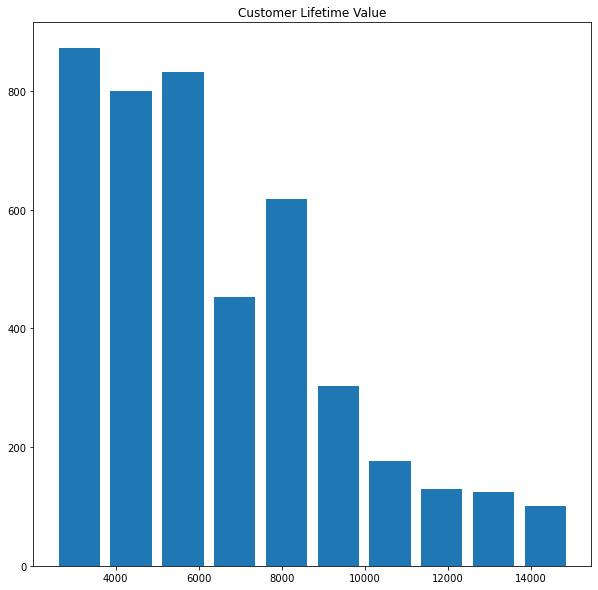

In [170]:
plt.figure(figsize=(10,10))
plt.hist(df['clv'],rwidth=0.8)
plt.title('Customer Lifetime Value',)

Text(0.5, 1.0, 'Vehicle class')

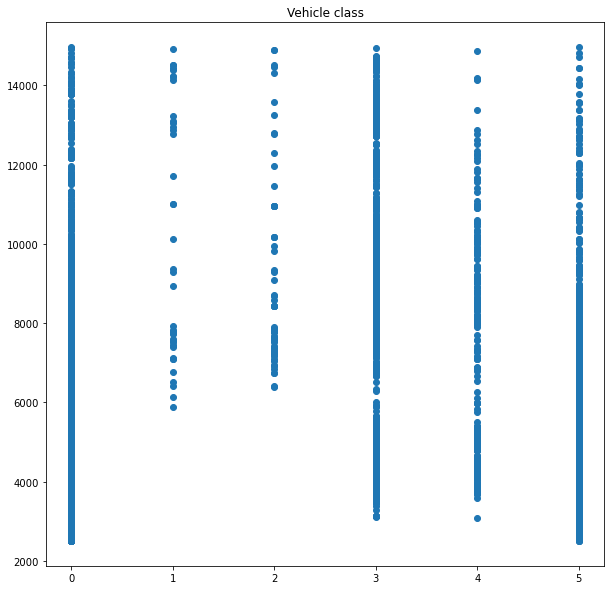

In [177]:
plt.figure(figsize=(10,10))
plt.scatter(df['Vehicle.Class'],df['clv'])
plt.title('Vehicle class')

Above two graphs namely Bar graph shows clv data based on samples from the data and their frequency.
Scatter plot shows the frequency of cars of different classes.

# 4. Modeling

### Test Train split

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data , data2, test_size=0.3, random_state=200)

In [75]:
X_train.shape

(3086, 6)

In [76]:
y_train.shape

(3086,)

In [77]:
 X_test.shape

(1323, 6)

In [78]:
y_test.shape

(1323,)

### Applying different regression techniques

### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lm = LinearRegression()

In [82]:
lm.fit(X_train,y_train)

LinearRegression()

In [83]:
print('Training accuracy=',lm.score(X_train,y_train)*100)

Training accuracy= 38.1963250831033


In [84]:
pred = lm.predict(X_test)

In [85]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Prediction accuracy =',metrics.explained_variance_score(y_test, pred)*100)

Prediction accuracy = 41.238853956190134


In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.28198378979862987
MSE: 0.12308355608899198
RMSE: 0.35083266109213945


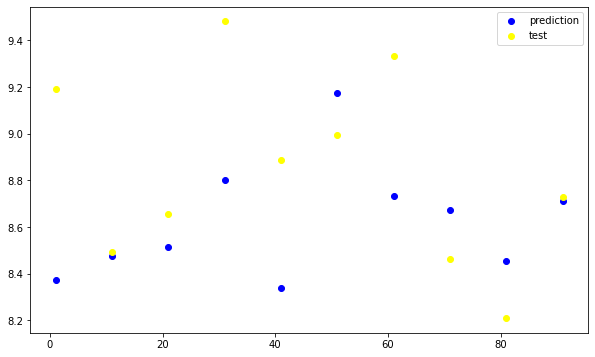

In [87]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),pred[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),y_test[0:100:10],color='yellow')

plt.legend(['prediction','test'])

### XGBoost Regressor

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data, data2, test_size=0.3, random_state=42)

In [102]:
import xgboost

In [103]:
from xgboost import XGBRegressor

In [104]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
my_model.fit(X_train, y_train, early_stopping_rounds = 5,
             eval_set=[(X_train, y_train)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [105]:
my_model.score(X_train, y_train)*100

99.53659722059561

In [106]:
pred = my_model.predict(X_test)

In [107]:
print('Prediction accuracy =',metrics.explained_variance_score(y_test, pred)*100)

Prediction accuracy = 96.47759743489978


In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.05072783608392673
MSE: 0.007241189803359307
RMSE: 0.08509518084685705


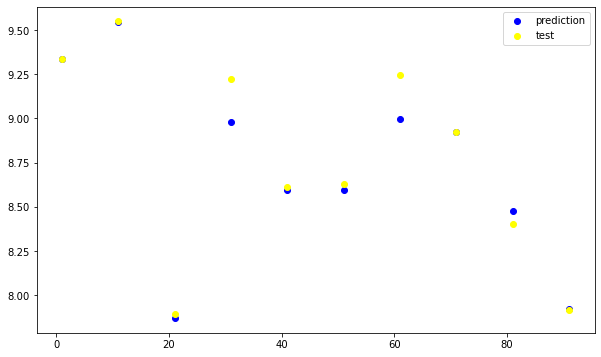

In [109]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),pred[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),y_test[0:100:10],color='yellow')

plt.legend(['prediction','test'])

### We have applied two regression techniques above  which are :- 
#### 1. Linear Regression -- MSE: 0.12308355608899198 with a prediction accuracy of 41 %
#### 2. XGBoost Regressor -- MSE: 0.007241189803359307 with a prediction accuracy of 96 %

# 5. Model Fine Tuning

In [111]:
my_model.fit(X_train, y_train, early_stopping_rounds = 5,
             eval_set=[(X_train, y_train)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [139]:
my_model_t=XGBRegressor(n_estimators=500,max_depth=2,learning_rate=0.1,booster='gbtree')

In [140]:
my_model_t.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [141]:
y_pred = my_model_t.predict(X_test)

In [142]:
print('Prediction accuracy =',metrics.explained_variance_score(y_test, y_pred)*100)

Prediction accuracy = 96.98792069058696


In [146]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.048712166510746766
MSE: 0.006194201444700788
RMSE: 0.07870324926393311


From fine tuning , it definitely improved the mSE score as well as Prediction accuracy